In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

dataset_train = pd.read_csv('./Ash/df_reg_imp.csv')
dataset_train = dataset_train.drop(['Alley','MiscFeature','Fence','PoolQC'], axis = 1)

In [11]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.fit_transform(X_test[:, :])

In [13]:
# degree larger than 3 will cause the program crash
degrees = [5]
for i in degrees:
    poly_reg = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)

    y_tr_pred = lin_reg.predict(X_poly)
    y_ts_pred = lin_reg.predict(poly_reg.transform(X_test))
    print('Degree %d train MSE: %.3f' % (i, mean_squared_error(y_train, y_tr_pred)))
    print('Degree %d test MSE: %.3f' % (i, mean_squared_error(y_test, y_ts_pred)))

    START_POINT = 100
    END_POINT = 150
    x = np.arange(START_POINT, END_POINT)
    plt.plot(x, y_ts_pred[START_POINT:END_POINT],color = 'red')
    plt.scatter(x, y_test[START_POINT:END_POINT],color = 'blue')

    plt.show()

MemoryError: Unable to allocate 209. GiB for an array with shape (1168, 24040015) and data type float64

The increasing complexity of the models leads to a decrease in the train error (lower bias), but also a significant increase in the test error (high variance).
The best fit is represented by the polynomial degree that minimizes the test error:

In [35]:
from mlxtend.evaluate import bias_variance_decomp

lin_reg = LinearRegression()
mse, bias, var = bias_variance_decomp(lin_reg, X_train, y_train, X_test, y_test, loss='mse', num_rounds=50, random_seed=17)

print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 16841115259354941937851607837310976.000
Bias: 118190013025290475640942428684288.000
Variance: 16722925246329653768053674622320640.000


In [2]:
X = dataset_train.iloc[:, :-1].values
y = dataset_train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
model = PCA(n_components = 10).fit(X_train)

X_train = model.transform(X_train)
X_test = model.transform(X_test)
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.fit_transform(X_test[:, :])

Degree 1 train MSE: 2089339659.130
Degree 1 test MSE: 1391288900.947


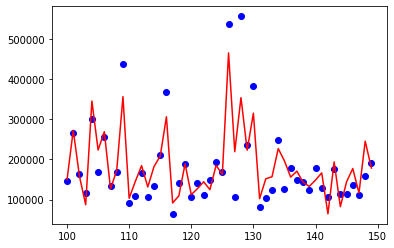

Degree 2 train MSE: 1239462805.922
Degree 2 test MSE: 2637548863.460


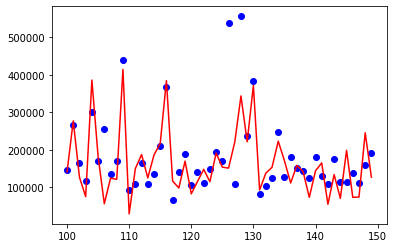

Degree 3 train MSE: 624619744.054
Degree 3 test MSE: 2603811476961319.000


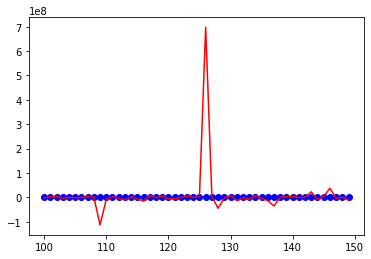

Degree 4 train MSE: 64438559.866
Degree 4 test MSE: 3076070268700280464867328.000


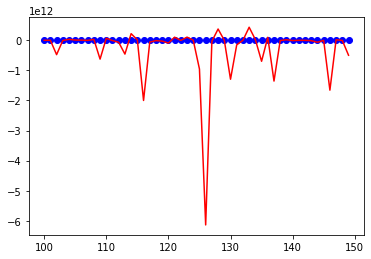

Degree 5 train MSE: 0.001
Degree 5 test MSE: 55630349847415054336.000


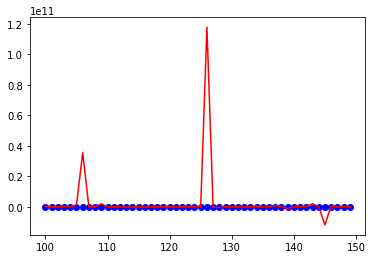

Degree 6 train MSE: 0.280
Degree 6 test MSE: 812674285103052357632.000


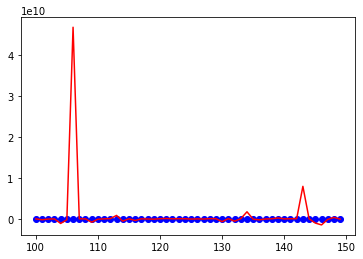

Degree 7 train MSE: 16.196
Degree 7 test MSE: 2904498876690693357568.000


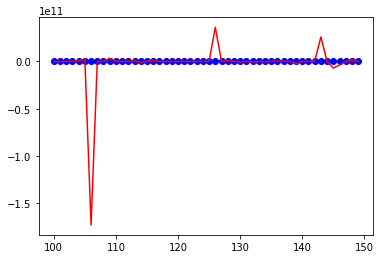

Degree 8 train MSE: 23881.007
Degree 8 test MSE: 1018512399010774384640.000


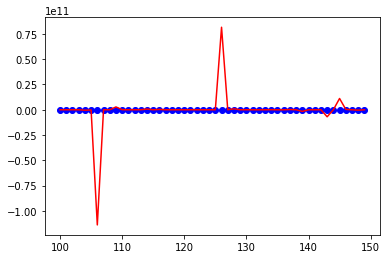

Degree 9 train MSE: 278435.864
Degree 9 test MSE: 4560421532504001871872.000


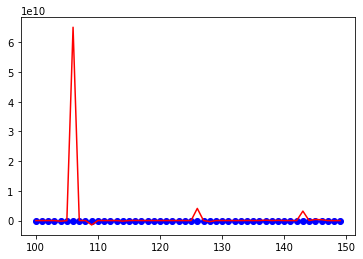

In [8]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in degrees:
    poly_reg = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)

    y_tr_pred = lin_reg.predict(X_poly)
    y_ts_pred = lin_reg.predict(poly_reg.transform(X_test))

    train_mse = mean_squared_error(y_train, y_tr_pred)
    test_mse = mean_squared_error(y_test, y_ts_pred)

    print('Degree %d train MSE: %.3f' % (i, train_mse))
    print('Degree %d test MSE: %.3f' % (i, test_mse))

    START_POINT = 100
    END_POINT = 150
    x = np.arange(START_POINT, END_POINT)
    plt.plot(x, y_ts_pred[START_POINT:END_POINT],color = 'red')
    plt.scatter(x, y_test[START_POINT:END_POINT],color = 'blue')

    plt.show()